# Previsão de renda

## Etapa 1 CRISP - DM: Entendimento do negócio


Em uma instituição financeira, entender o perfil dos novos clientes é crucial para diversas finalidades, como avaliar a capacidade de pagamento, prever comportamentos financeiros e dimensionar limites de crédito de forma responsável. Essa análise também desempenha um papel importante na mitigação de riscos, como a inadimplência, e na personalização das ofertas de produtos e serviços para atender às necessidades dos clientes de maneira eficaz.


## Etapa 2 Crisp-DM: Entendimento dos dados
Para uma análise completa e eficaz dos dados dos clientes salvos no banco de dados do banco, é importante realizar uma série de etapas de entendimento dos dados.

Essas análises ajudarão a obter insights valiosos sobre os dados dos clientes, identificar padrões relevantes e preparar os dados de forma adequada para a construção do modelo preditivo de renda.


### Dicionário de dados

Aqui temos informações sobre as variáveis nos seus dados de uma instituição financeira, como o nome da variável, a descrição e o tipo de dados.


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência                                    | object|
| id_cliente              |  Identificador do cliente                                      | `int`|
| sexo                    |  Gênero                                      | object|
| posse_de_veiculo        |  Possui veículo                                      | Bool(binário) |
| posse_de_imovel         |  Possui imóvel                                      |Bool(binário)|
| qtd_filhos              |  Quantidade de filhos                                     | `int`|
| tipo_renda              |  Tipo de renda                                    | object|
| educacao                | Nível de educação                                     | object|
| estado_civil            |  Estado civil                                      | object|
| tipo_residencia         |  Tipo de residência                                    | object|
| idade                   | Idade                                   | `float`|
| tempo_emprego           |  Tempo de emprego (em anos)                                   |`float`|
| qt_pessoas_residencia   |  Quantidade de pessoas na residência                                    | `float`|
| renda                   |  Renda                                   | `float`|





#### Carregando os pacotes

In [1]:
#pip install ydata-profiling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from pandas_profiling import ProfileReport
from ydata_profiling import ProfileReport
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

Aqui geramos um DataFrame chamado 'renda', e as primeiras linhas dos dados são exibidas usando o método head().


In [2]:
renda = pd.read_csv('./input/previsao_de_renda.csv')
renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [3]:
# Parâmetro para avaliar os valores únicos do arquivo/variável renda
renda.nunique()

Unnamed: 0               15000
data_ref                    15
id_cliente                9845
sexo                         2
posse_de_veiculo             2
posse_de_imovel              2
qtd_filhos                   8
tipo_renda                   5
educacao                     5
estado_civil                 5
tipo_residencia              6
idade                       47
tempo_emprego             2589
qt_pessoas_residencia        9
renda                     9786
dtype: int64

In [4]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

print('Quantidade total de linhas antes da remoção:', len(renda))
renda.drop_duplicates(inplace=True, ignore_index=True)
print('Quantidade total de linhas após remoção:', len(renda))

Quantidade total de linhas antes da remoção: 15000
Quantidade total de linhas após remoção: 15000


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [5]:
prof = ProfileReport(renda, minimal=True)

# Salvar o relatório em HTML
output_filepath = './output/renda_analysis.html'
prof.to_file(output_filepath)

# Exibir o relatório no notebook
prof.to_notebook_iframe()

# Imprimir o caminho do arquivo de saída
print(f"Relatório gerado e salvo em: {output_filepath}")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Relatório gerado e salvo em: ./output/renda_analysis.html


In [6]:
# Calculate descriptive statistics for numeric columns
desc_stats = renda.describe()

# Transpose the descriptive statistics for better readability
desc_stats = desc_stats.transpose()

# Display the descriptive statistics
desc_stats

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,15000.0,7499.500000,4330.271354,0.000000,3749.750000,7499.500000,11249.250000,14999.000000
id_cliente,15000.0,8304.871400,4797.780446,1.000000,4181.000000,8297.000000,12403.000000,16649.000000
qtd_filhos,15000.0,0.432333,0.746631,0.000000,0.000000,0.000000,1.000000,14.000000
idade,15000.0,43.882333,11.273155,22.000000,34.000000,43.000000,53.000000,68.000000
tempo_emprego,12427.0,7.722635,6.711189,0.117808,2.973973,6.013699,10.120548,42.906849
qt_pessoas_residencia,15000.0,2.206400,0.909792,1.000000,2.000000,2.000000,3.000000,15.000000
renda,15000.0,5697.287057,8266.816289,118.710000,2026.110000,3499.720000,6392.167500,245141.670000


**Análise de Correlação:**

- Calcule a matriz de correlação entre todas as variáveis numéricas para identificar relações lineares entre elas.

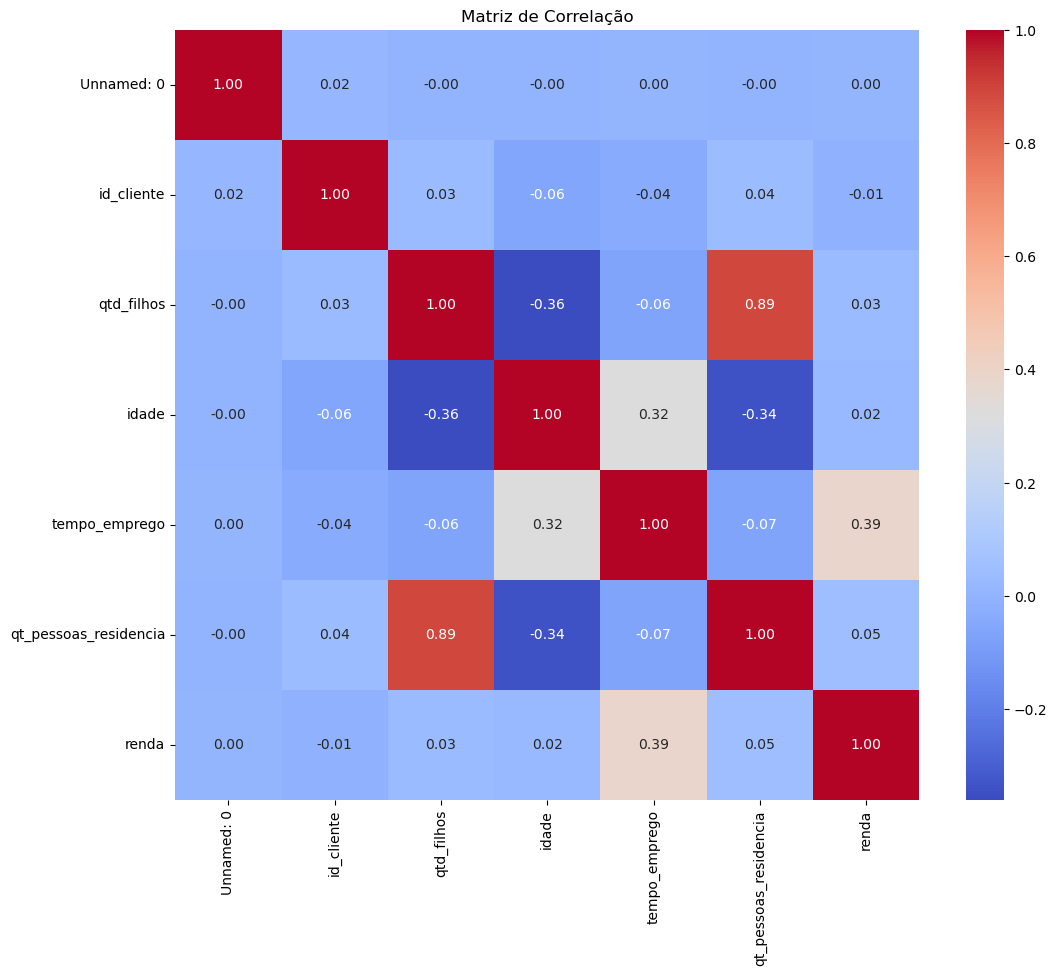

In [7]:
# Matriz de correlação
num_vars = renda.select_dtypes(include=['int64', 'float64'])
correlation_matrix = num_vars.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

In [8]:
# Selecionar apenas as colunas numéricas
colunas_numericas = renda.select_dtypes(include=['float64', 'int64'])

# Calcular a correlação entre as colunas numéricas
correlacao = colunas_numericas.corr()

# Exibir a última linha da matriz de correlação
ultima_linha_correlacao = correlacao.tail(1)

ultima_linha_correlacao

,Unnamed: 0,id_cliente,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
renda,0.004901,-0.009129,0.029346,0.022435,0.385013,0.047842,1.0


Analisando a matriz de correlação, identificamos que a variável mais correlacionada com a renda é o tempo de emprego, apresentando um índice de correlação de 38,5%. Esse resultado é um insight valioso para compreender e prever o perfil dos clientes de forma mais precisa.

**Matriz Dispersão:**
- Divida os dados em grupos com base em uma variável categórica relevante e compare as distribuições de outras variáveis entre esses grupos.

C:\Users\lpell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


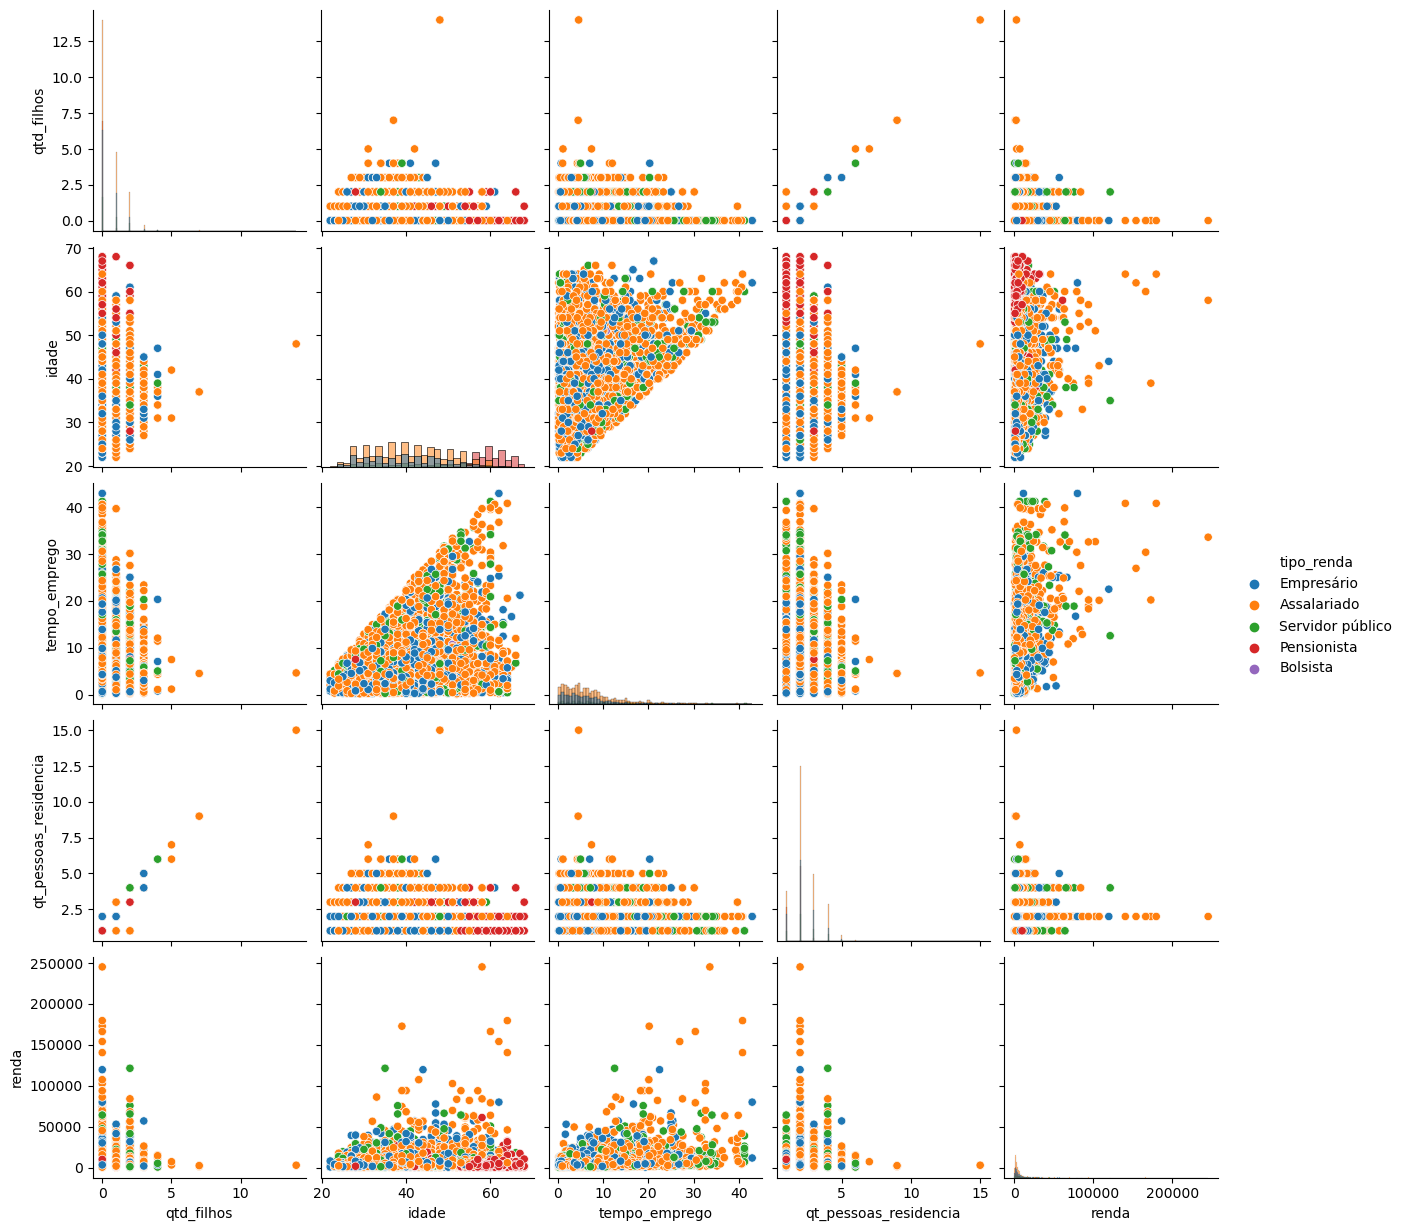

In [9]:
sns.pairplot(data=renda, 
             hue='tipo_renda', 
             vars=['qtd_filhos', 
                   'idade', 
                   'tempo_emprego', 
                   'qt_pessoas_residencia', 
                   'renda'], 
             diag_kind='hist')

plt.show()

Ao examinar o pairplot, que é uma representação gráfica da matriz de dispersão, é possível detectar alguns outliers na variável de renda. Embora ocorram com baixa frequência, esses outliers podem afetar a análise de tendências, por exemplo. Além disso, observa-se uma correlação baixa entre as variáveis quantitativas, o que reforça os resultados encontrados na matriz de correlação.

**Clustermap**

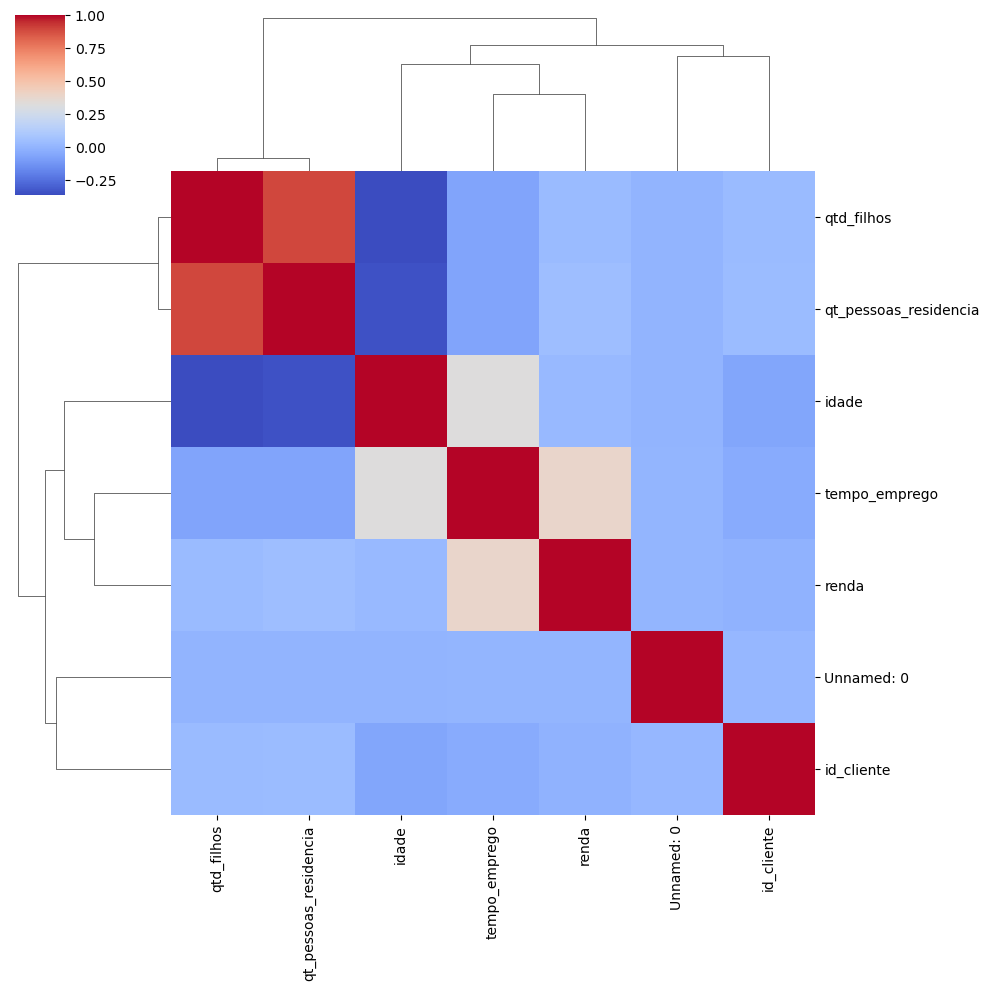

In [10]:
sns.clustermap(data=correlation_matrix, cmap='coolwarm', figsize=(10, 10))
plt.show()

Com o cluestermap é possível observar resultados de baixa correlação com a variável renda. Apenas a variável tempo_emprego apresenta um número considerável

**Análise das variáveis qualitativas:**
- Análise de relevância preditiva com variáveis booleanas

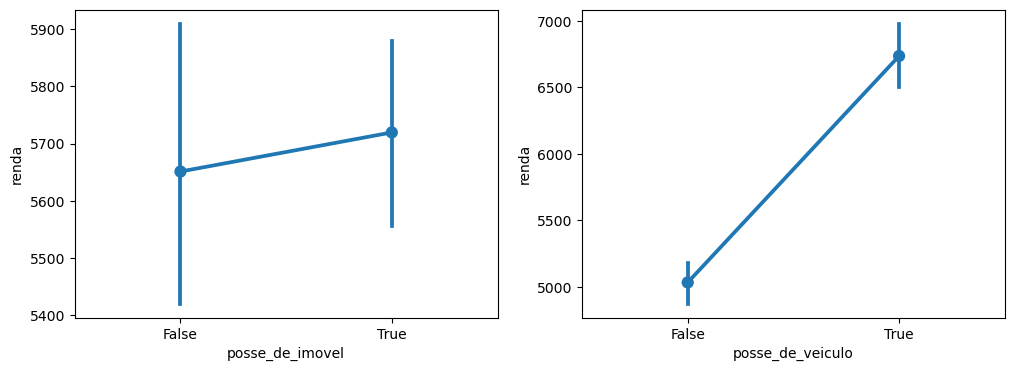

In [11]:
plt.rc('figure', figsize=(12,4))
fig, axes = plt.subplots(nrows=1, ncols=2)

sns.pointplot(x='posse_de_imovel', 
              y='renda',  
              data=renda, 
              dodge=True, 
              ax=axes[0])

sns.pointplot(x='posse_de_veiculo', 
              y='renda', 
              data=renda, 
              dodge=True, 
              ax=axes[1])

plt.show()

**Posse de Imóvel vs. Renda:**
- No gráfico de posse de imóvel versus renda, observamos uma sobreposição considerável nos intervalos de confiança para clientes que possuem ou não imóvel. Isso sugere que a posse de imóvel pode ter uma influência limitada na predição da renda, pois as médias das rendas para ambos os grupos estão próximas.

**Posse de Veículo vs. Renda:**
- Já no gráfico de posse de veículo versus renda, notamos uma distância mais significativa entre os intervalos de confiança para clientes que possuem ou não veículo. Essa diferença sugere que a posse de veículo pode ser um fator mais relevante na predição da renda, pois as médias das rendas para os grupos de posse e não posse de veículo estão mais distantes.

Essa comparação reforça a ideia de que a posse de veículo pode ter uma influência maior na renda do cliente em comparação com a posse de imóvel, tornando-a uma variável mais relevante na análise preditiva da renda.

**Análise das variáveis qualitativas ao longo do tempo**

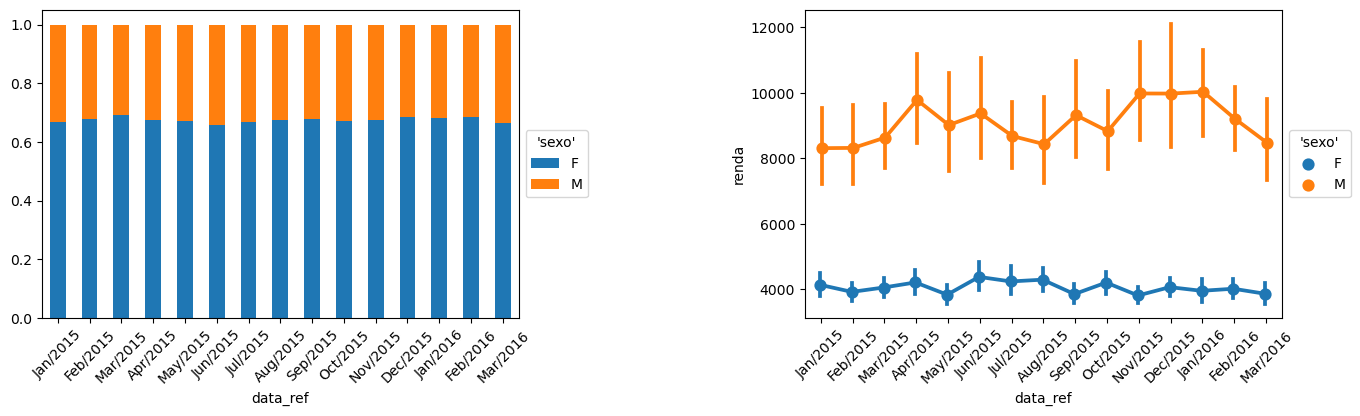

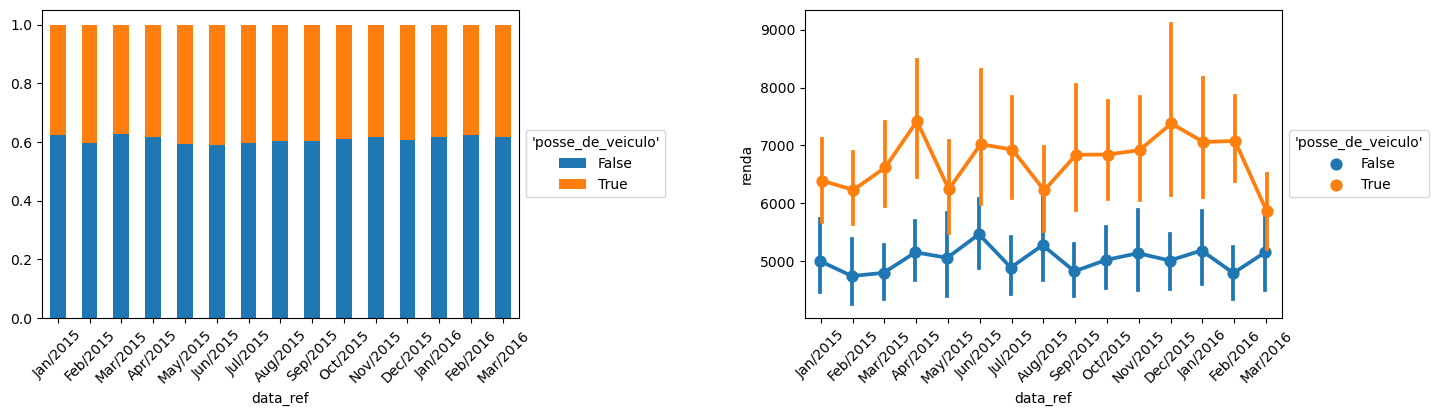

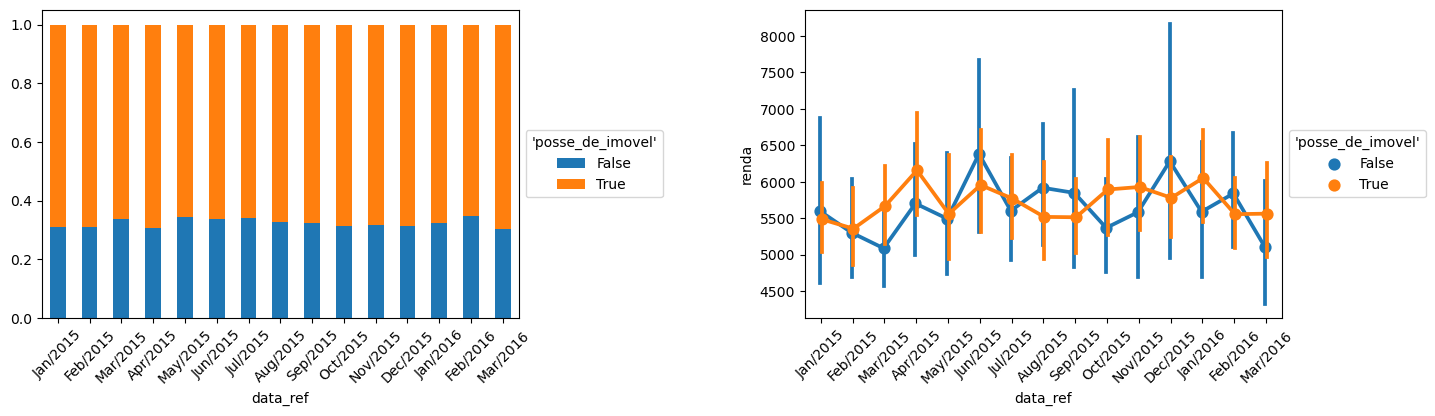

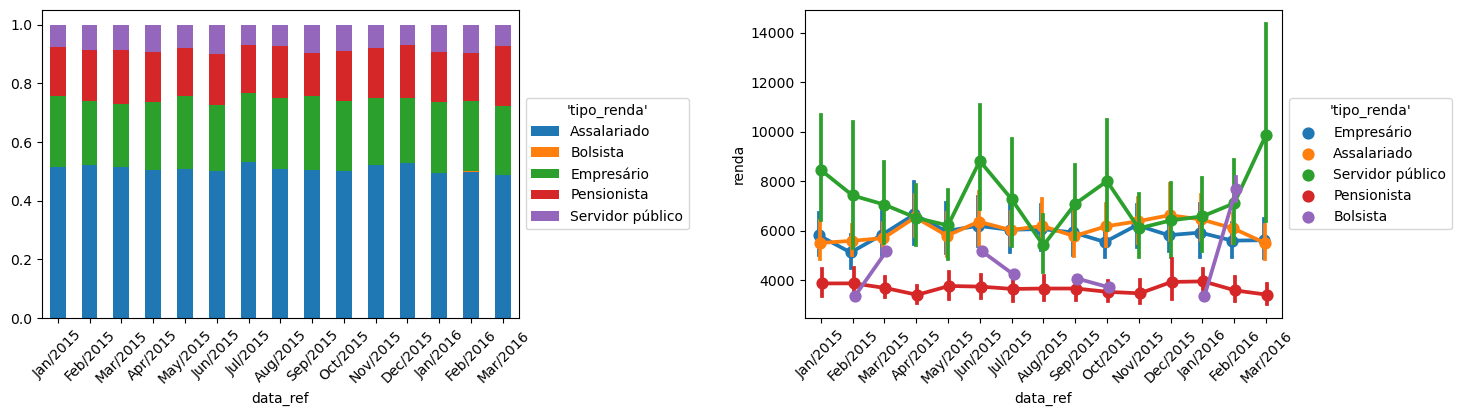

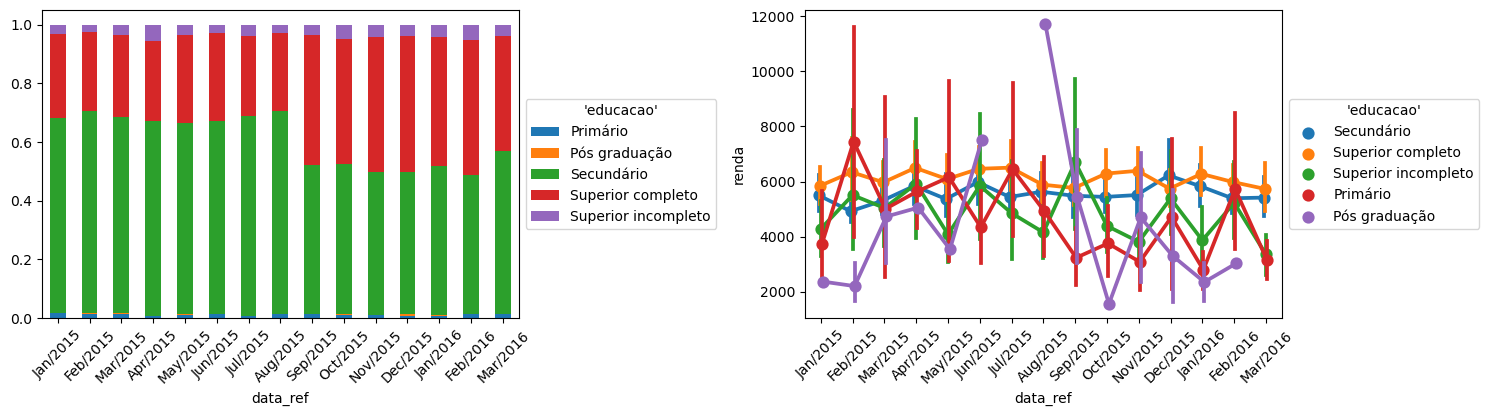

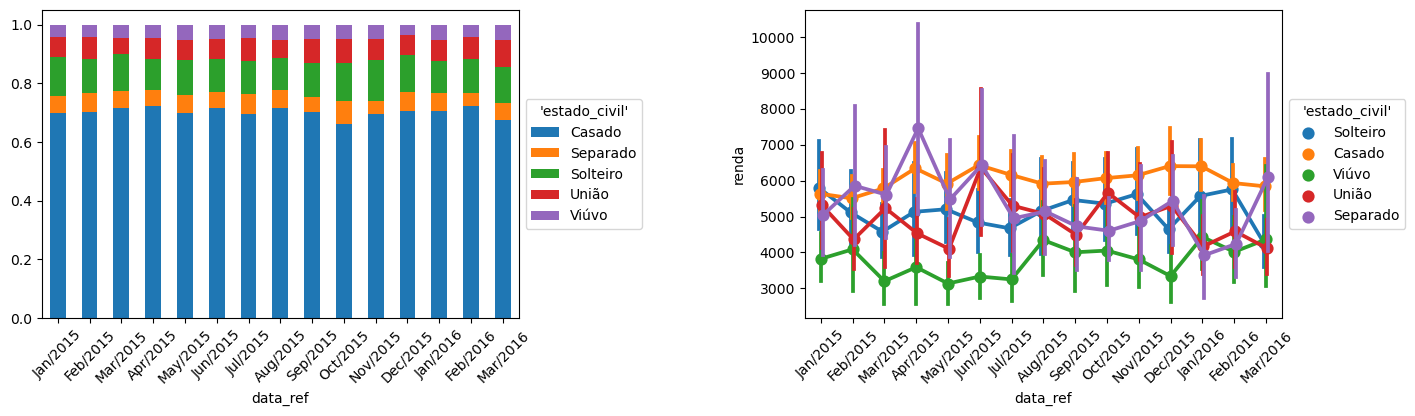

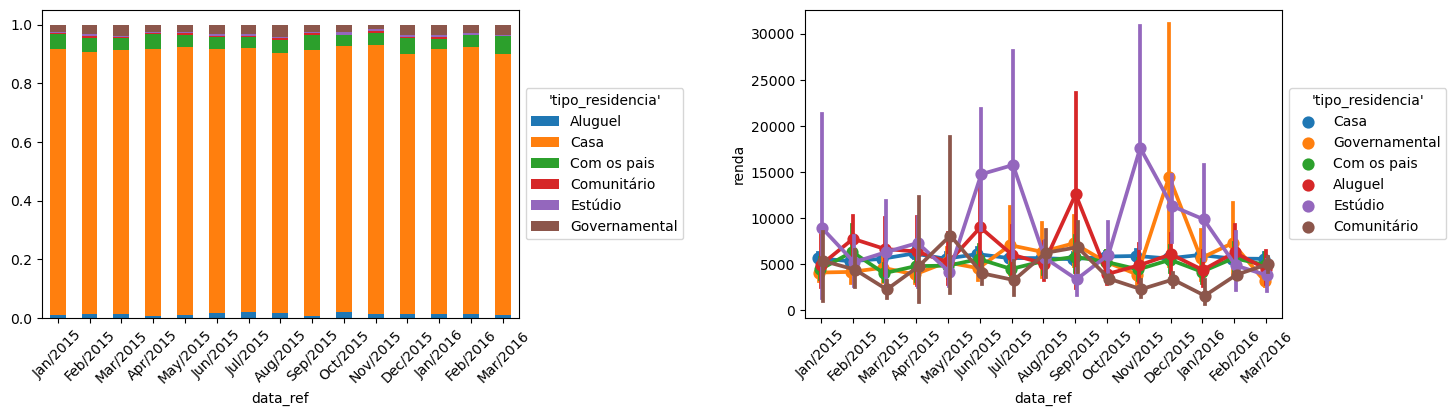

In [12]:
renda['data_ref'] = pd.to_datetime(arg=renda['data_ref'])
qualitativas = renda.select_dtypes(include=['object', 'boolean']).columns
plt.rc('figure', figsize=(16,4))
for col in qualitativas:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.subplots_adjust(wspace=.6)
    
    tick_labels = renda['data_ref'].map(lambda x: x.strftime('%b/%Y')).unique()
    
    # barras empilhadas:
    renda_crosstab = pd.crosstab(index=renda['data_ref'], 
                                 columns=renda[col], 
                                 normalize='index')
    ax0 = renda_crosstab.plot.bar(stacked=True, 
                                  ax=axes[0])
    ax0.set_xticklabels(labels=tick_labels, rotation=45)
    axes[0].legend(bbox_to_anchor=(1, .5), loc=6, title=f"'{col}'")
    
    # perfis médios no tempo: 
    ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, errorbar=('ci', 95), ax=axes[1])
    ax1.set_xticklabels(labels=tick_labels, rotation=45)
    axes[1].legend(bbox_to_anchor=(1, .5), loc=6, title=f"'{col}'")
    
    plt.show()

### Entendimento dos dados - Bivariadas


Para realizar uma análise bivariada dos dados fornecidos, podemos utilizar gráficos e estatísticas para entender as relações entre diferentes variáveis. 

**Aluguel vs. Renda:** Podemos observar que a proporção de residências alugadas permanece relativamente estável ao longo do tempo, com pequenas variações mensais entre 0.006 e 0.021. Isso sugere uma certa estabilidade na preferência por residências alugadas entre os clientes ao longo dos meses analisados.

**Casa vs. Renda:** A categoria de residências em casa mostra uma variação mais ampla, oscilando entre 0.87 e 0.92 ao longo do período. Isso indica uma relativa consistência na preferência por casas, mas com algumas flutuações mensais.

**Com os pais vs. Renda:** A proporção de pessoas vivendo com os pais é menor em comparação com as outras categorias, variando principalmente entre 0.034 e 0.061. Parece haver uma tendência de queda nessa categoria ao longo do período analisado.

**Comunitário vs. Renda:** A categoria de residências comunitárias mostra uma variação baixa, variando entre 0.001 e 0.008. Isso sugere uma escolha menos frequente desse tipo de residência entre os clientes.

**Estúdio vs. Renda:** A proporção de estúdios parece ser estável ao longo do tempo, com variações entre 0.003 e 0.009. Isso indica uma relativa consistência na preferência por estúdios entre os clientes.

**Governamental vs. Renda:** A categoria de residências governamentais mostra uma variação baixa, variando principalmente entre 0.015 e 0.041. Isso sugere que essa categoria não é tão frequente entre os clientes.

Em resumo, podemos observar que a maioria dos clientes prefere residências em casa ou alugadas, com uma tendência de queda na proporção de pessoas vivendo com os pais ao longo do tempo. As outras categorias de residências têm proporções relativamente menores e flutuações mais estáveis ao longo do período analisado.

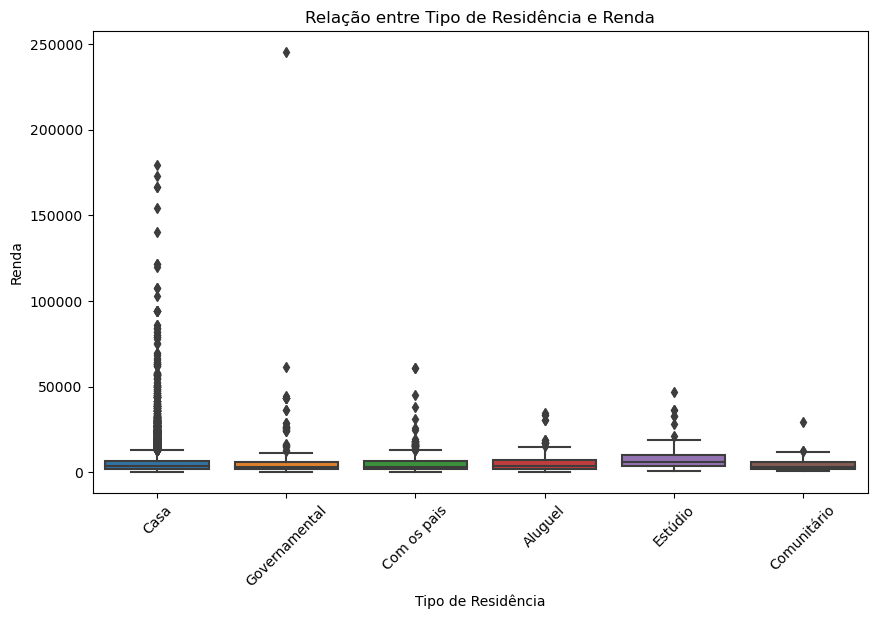

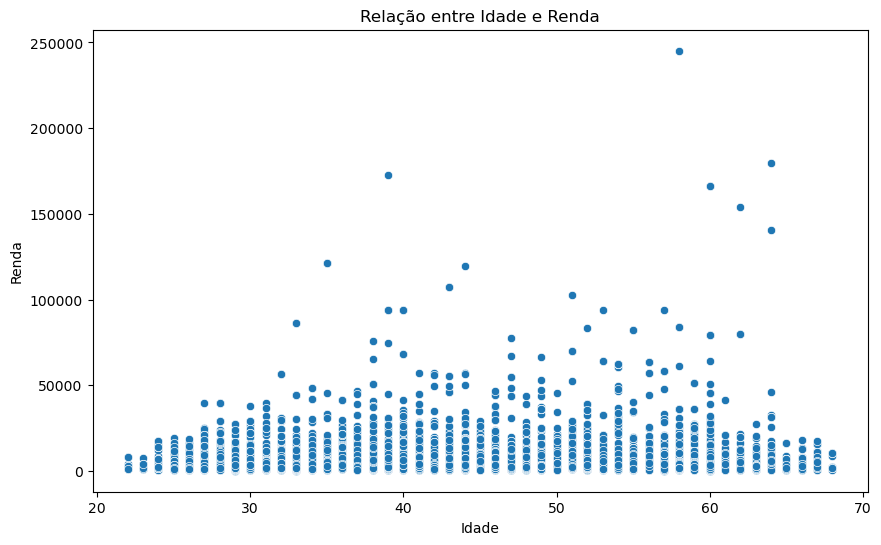

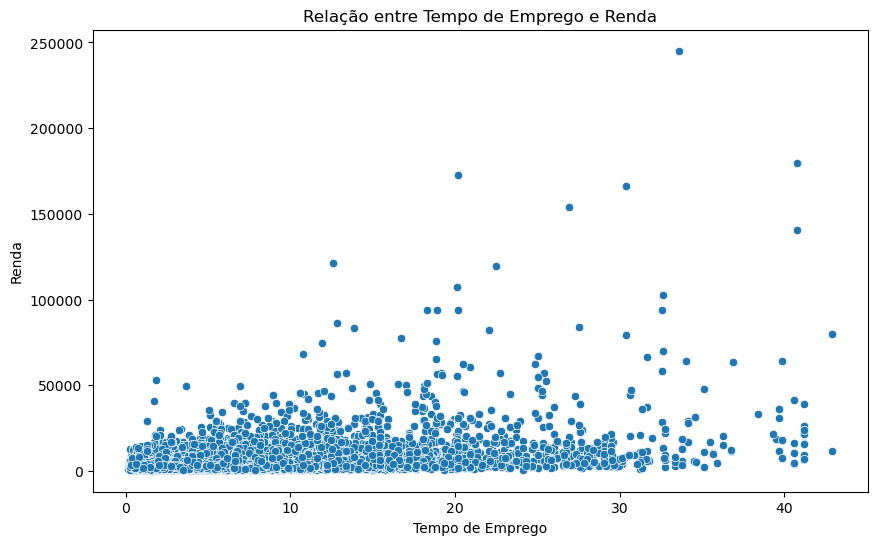

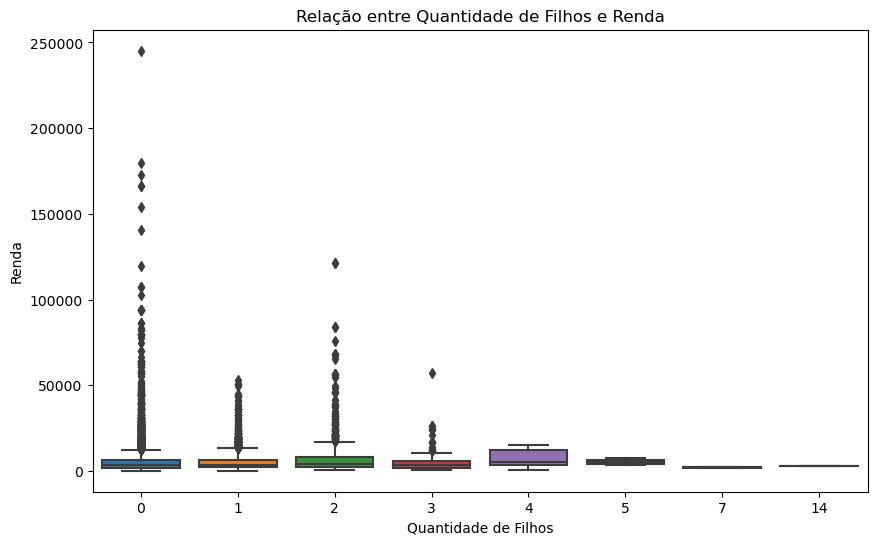

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='tipo_residencia', y='renda', data=renda)
plt.title('Relação entre Tipo de Residência e Renda')
plt.xlabel('Tipo de Residência')
plt.ylabel('Renda')
plt.xticks(rotation=45)
plt.show()

# Análise bivariada entre idade e renda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='idade', y='renda', data=renda)
plt.title('Relação entre Idade e Renda')
plt.xlabel('Idade')
plt.ylabel('Renda')
plt.show()

# Análise bivariada entre tempo de emprego e renda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo_emprego', y='renda', data=renda)
plt.title('Relação entre Tempo de Emprego e Renda')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Renda')
plt.show()

# Análise bivariada entre quantidade de filhos e renda
plt.figure(figsize=(10, 6))
sns.boxplot(x='qtd_filhos', y='renda', data=renda)
plt.title('Relação entre Quantidade de Filhos e Renda')
plt.xlabel('Quantidade de Filhos')
plt.ylabel('Renda')
plt.show()

- A análise bivariada realizada nos dados apresentou alguns insights relevantes para entender os fatores que podem influenciar a renda dentro do contexto do seu conjunto de dados:

**Tipo de Residência e Renda:** Observou-se uma relação entre o tipo de residência e a renda, onde clientes com diferentes tipos de residência apresentaram variações na renda. Isso sugere que o tipo de moradia pode impactar a renda dos clientes.

**Idade e Renda:** Não foi identificada uma relação clara entre a idade e a renda. A dispersão dos pontos no gráfico de dispersão não mostrou um padrão definido de aumento ou diminuição da renda com a idade, indicando que outros fatores podem ter maior influência na determinação da renda dos clientes.

**Tempo de Emprego e Renda:** Foi observada uma tendência de aumento da renda com o aumento do tempo de emprego. Isso sugere que clientes com mais tempo de experiência no emprego tendem a ter uma renda maior, o que pode ser resultado de progressão na carreira e aumento de salário ao longo do tempo.

**Quantidade de Filhos e Renda:** Verificou-se que a quantidade de filhos não apresentou uma relação clara com a renda. Os boxplots mostraram que a renda não varia significativamente com o número de filhos, indicando que outros fatores podem ser mais determinantes para a renda dos clientes.

A importância de considerar múltiplos fatores ao analisar e prever a renda dos clientes, incluindo não apenas características demográficas como idade e número de filhos, mas também aspectos relacionados ao emprego e à moradia.

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



**Seleção de Dados:**

- Verificar se os dados selecionados são adequados para a análise proposta. Caso contrário, pode ser necessário revisar e incluir/excluir variáveis conforme necessário.

In [14]:
renda.drop(columns='data_ref', inplace=True)

**Limpeza de Dados:**

- Identificar e tratar dados faltantes (valores ausentes) de maneira adequada, utilizando técnicas como imputação de valores médios, medianas, ou remoção de registros com valores faltantes dependendo do contexto.

In [15]:
renda.dropna(inplace=True)

**Construção de Novas Variáveis:**

- Avaliar se é necessário criar novas variáveis com base nas existentes para melhorar a análise e a modelagem posterior. Por exemplo, pode-se criar variáveis categóricas a partir de variáveis numéricas, criar variáveis de interação, etc.

In [16]:
new_variables_df = pd.DataFrame(index=renda.columns, 
                                data={'tipos_dados': renda.dtypes, 
                                      'qtd_valores': renda.notna().sum(), 
                                      'qtd_categorias': renda.nunique()})
new_variables_df

,tipos_dados,qtd_valores,qtd_categorias
Unnamed: 0,int64,12427,12427
id_cliente,int64,12427,8161
sexo,object,12427,2
posse_de_veiculo,bool,12427,2
posse_de_imovel,bool,12427,2
qtd_filhos,int64,12427,8
tipo_renda,object,12427,5
educacao,object,12427,5
estado_civil,object,12427,5
tipo_residencia,object,12427,6


**Integração de Dados:**
- Se estiver trabalhando com múltiplas fontes de dados, é necessário integrar esses dados de forma adequada para que possam ser utilizados de maneira conjunta na análise.

**Formatação de Dados:**

- Garantir que os dados estejam em formatos úteis para a análise, como datas no formato correto, strings padronizadas, etc. Além disso, converter dados categóricos em formatos numéricos, se necessário, para facilitar a modelagem.

In [17]:
# Formatação de Dados: Converter dados categóricos em variáveis numéricas (dummies)
renda_dummies= pd.get_dummies(data=renda)
renda_dummies.head()

,Unnamed: 0,id_cliente,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_F,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,0,15056,False,True,0,26,6.602740,1.0,8060.34,True,...,False,True,False,False,False,True,False,False,False,False
1,1,9968,True,True,0,28,7.183562,2.0,1852.15,False,...,False,False,False,False,False,True,False,False,False,False
2,2,4312,True,True,0,35,0.838356,2.0,2253.89,True,...,False,False,False,False,False,True,False,False,False,False
3,3,10639,False,True,1,30,4.846575,3.0,6600.77,True,...,False,False,False,False,False,True,False,False,False,False
4,4,7064,True,False,0,33,4.293151,1.0,6475.97,False,...,False,True,False,False,False,False,False,False,False,True


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


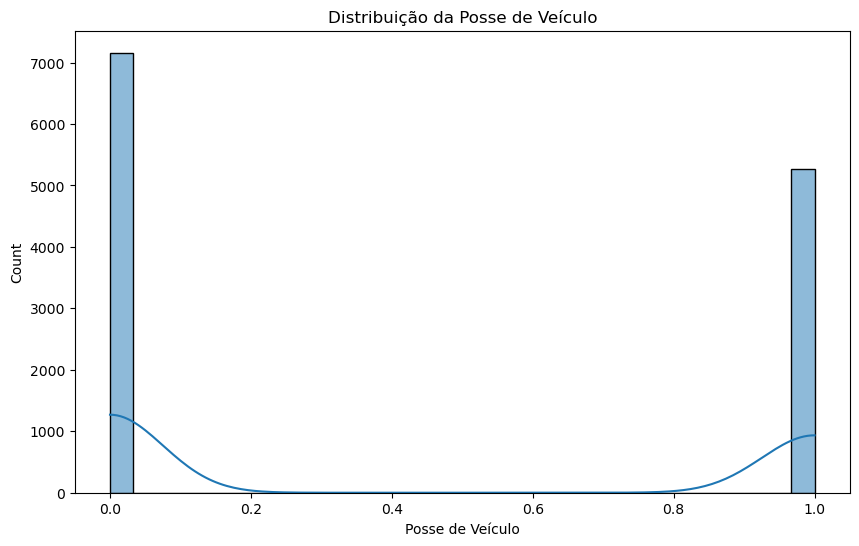

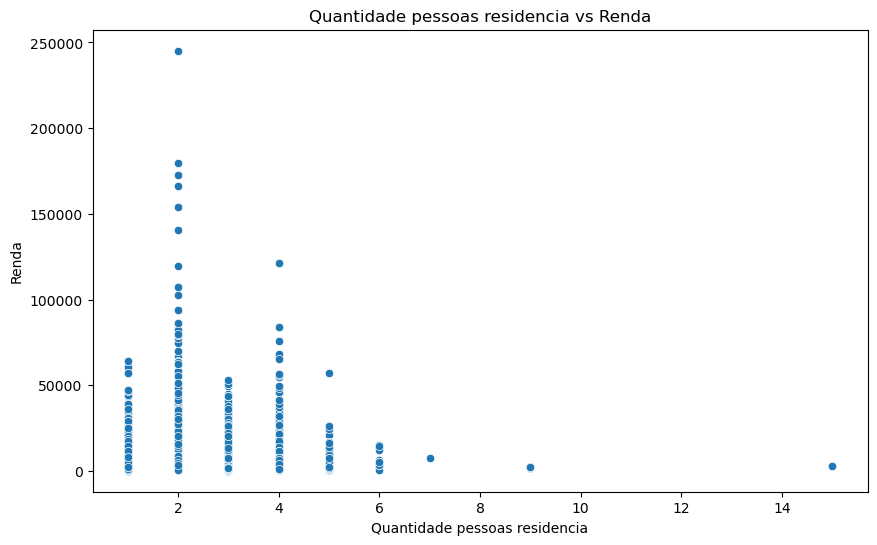

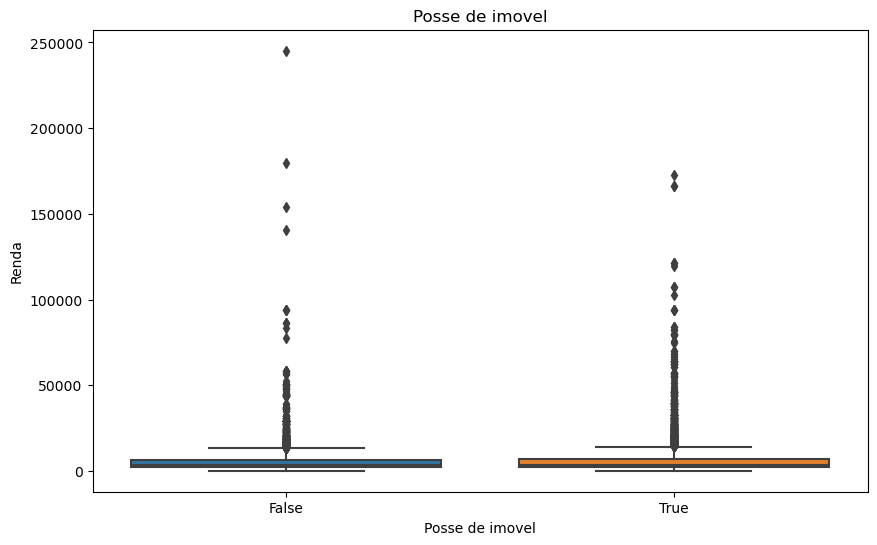

Correlação Posse de Veículo vs Renda: 0.08310496759476486
Quantidade pessoas residencia vs Renda: 0.08310496759476486
Posse de imovel vs Renda: 0.08310496759476486


In [18]:
# Histograma da Posse de Veículo
plt.figure(figsize=(10, 6))
sns.histplot(data=renda, x='posse_de_veiculo', bins=30, kde=True)
plt.title('Distribuição da Posse de Veículo')
plt.xlabel('Posse de Veículo')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=renda, x='qt_pessoas_residencia', y='renda')
plt.title('Quantidade pessoas residencia vs Renda')
plt.xlabel('Quantidade pessoas residencia')
plt.ylabel('Renda')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=renda, x='posse_de_imovel', y='renda')
plt.title('Posse de imovel')
plt.xlabel('Posse de imovel')
plt.ylabel('Renda')
plt.show()

# Correlação
correlacao_posse_renda = renda['posse_de_veiculo'].corr(renda['renda'])
print(f"Correlação Posse de Veículo vs Renda: {correlacao_posse_renda}")
correlacao_pessoas_renda = renda['qt_pessoas_residencia'].corr(renda['renda'])
print(f"Quantidade pessoas residencia vs Renda: {correlacao_posse_renda}")
correlacao_imovel_renda = renda['posse_de_imovel'].corr(renda['renda'])
print(f"Posse de imovel vs Renda: {correlacao_posse_renda}")

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


- **Técnica de modelagem**

A técnica de modelagem escolhida é o Decision Tree Regressor. Esta escolha se baseia na capacidade do algoritmo em lidar eficazmente com problemas de regressão, como a previsão de renda dos clientes. Além disso, as árvores de decisão são conhecidas por sua facilidade de interpretação, o que é crucial para entender como o modelo faz suas previsões e quais atributos são mais relevantes.

In [19]:
X = renda_dummies.drop(columns='renda')
y = renda_dummies['renda']

print('Quantidade de linhas e colunas de X:', X.shape)
print('Quantidade de linhas de y:', len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

Quantidade de linhas e colunas de X: (12427, 31)
Quantidade de linhas de y: 12427
X_train: (9320, 31)
X_test: (3107, 31)
y_train: (9320,)
y_test: (3107,)


In [20]:
score_data = []

for max_depth in range(1, 21):
    for min_samples_leaf in range(1, 31):
        reg_tree = DecisionTreeRegressor(random_state=42, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        reg_tree.fit(X_train, y_train)
        
        score_data.append({'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf, 'score': reg_tree.score(X=X_test, y=y_test)})

score = pd.DataFrame(score_data)
score_sorted = score.sort_values(by='score', ascending=False)
score_sorted.head()

,max_depth,min_samples_leaf,score
137,5,18,0.404094
139,5,20,0.402842
138,5,19,0.402842
103,4,14,0.397264
107,4,18,0.397264


### Rodando o modelo


In [21]:
best_max_depth = int(score_sorted.iloc[0]['max_depth'])
best_min_samples_leaf = int(score_sorted.iloc[0]['min_samples_leaf'])

reg_tree = DecisionTreeRegressor(random_state=42, max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf)
reg_tree.fit(X_train, y_train)
print("Melhores hiperparâmetros:")
print(f"max_depth: {best_max_depth}")
print(f"min_samples_leaf: {best_min_samples_leaf}")

Melhores hiperparâmetros:
max_depth: 5
min_samples_leaf: 18


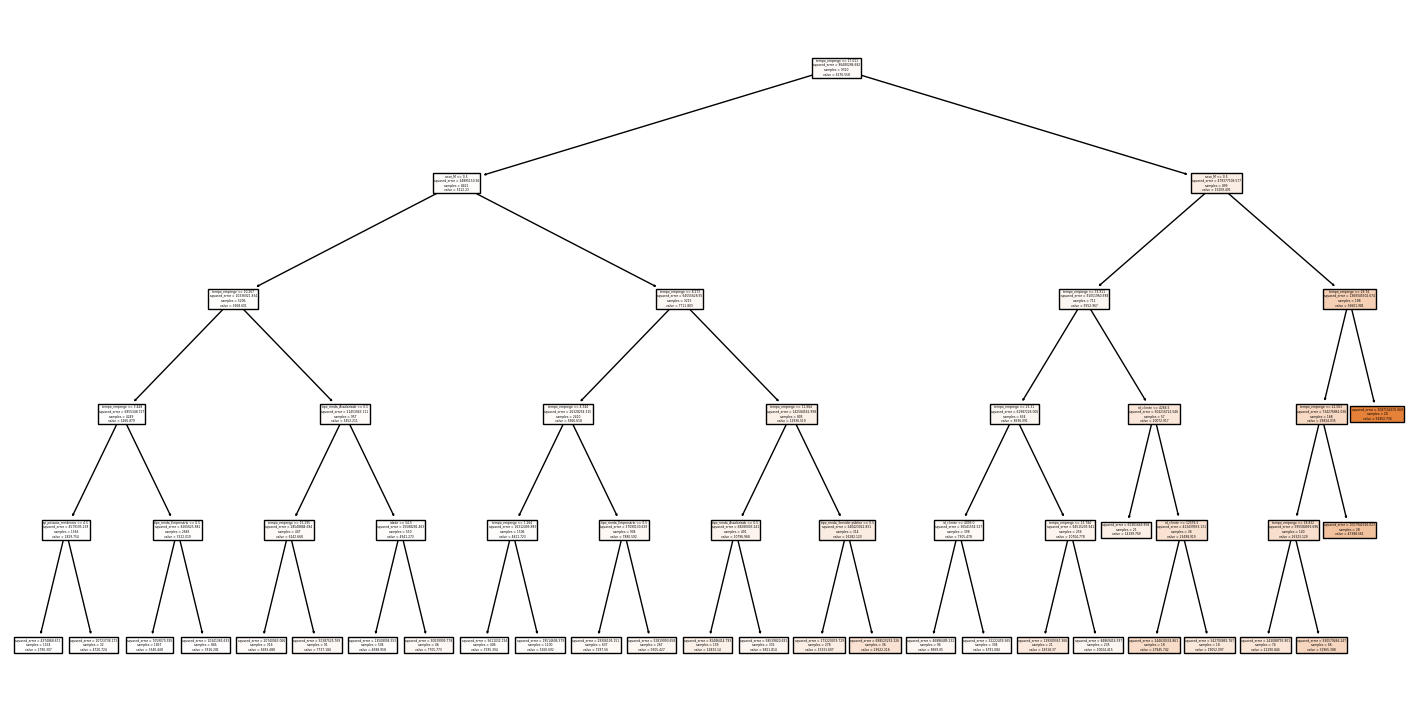

In [22]:
plt.figure(figsize=(18, 9))
tp = tree.plot_tree(decision_tree=reg_tree, feature_names=X.columns.tolist(), filled=True)
plt.show()

In [23]:
text_tree_print = tree.export_text(decision_tree=reg_tree, feature_names=list(X.columns))
print(text_tree_print)

|--- tempo_emprego <= 17.01
|   |--- sexo_M <= 0.50
|   |   |--- tempo_emprego <= 10.27
|   |   |   |--- tempo_emprego <= 3.45
|   |   |   |   |--- qt_pessoas_residencia <= 4.50
|   |   |   |   |   |--- value: [2790.31]
|   |   |   |   |--- qt_pessoas_residencia >  4.50
|   |   |   |   |   |--- value: [4720.72]
|   |   |   |--- tempo_emprego >  3.45
|   |   |   |   |--- tipo_renda_Empresário <= 0.50
|   |   |   |   |   |--- value: [3340.45]
|   |   |   |   |--- tipo_renda_Empresário >  0.50
|   |   |   |   |   |--- value: [3916.28]
|   |   |--- tempo_emprego >  10.27
|   |   |   |--- tipo_renda_Assalariado <= 0.50
|   |   |   |   |--- tempo_emprego <= 15.29
|   |   |   |   |   |--- value: [5683.49]
|   |   |   |   |--- tempo_emprego >  15.29
|   |   |   |   |   |--- value: [7737.18]
|   |   |   |--- tipo_renda_Assalariado >  0.50
|   |   |   |   |--- idade <= 54.50
|   |   |   |   |   |--- value: [4688.96]
|   |   |   |   |--- idade >  54.50
|   |   |   |   |   |--- value: [7705.77]
| 

## Etapa 5 Crisp-DM: Avaliação dos resultados


In [24]:
# Calcular o coeficiente de determinação (R2) para os conjuntos de treinamento e teste
r2_train = reg_tree.score(X=X_train, y=y_train)
r2_test = reg_tree.score(X=X_test, y=y_test)

# Imprimir os resultados
template_r2 = 'O coeficiente de determinação (R2) da árvore com profundidade = {0} para a base de {1} é: {2:.2f}'
print(template_r2.format(reg_tree.get_depth(), 'treino', r2_train))
print(template_r2.format(reg_tree.get_depth(), 'teste', r2_test))

O coeficiente de determinação (R2) da árvore com profundidade = 5 para a base de treino é: 0.46
O coeficiente de determinação (R2) da árvore com profundidade = 5 para a base de teste é: 0.40


In [25]:
# Criar uma coluna 'renda_predict' com as previsões da renda
renda['renda_predict'] = reg_tree.predict(X)

# Mostrar as colunas 'renda' e 'renda_predict'
renda[['renda', 'renda_predict']]

,renda,renda_predict
0,8060.34,3916.280556
1,1852.15,7297.560126
2,2253.89,2790.306930
3,6600.77,3340.448176
4,6475.97,5260.692345
...,...,...
14994,1592.57,12833.140377
14995,7990.58,5683.488291
14997,604.82,3340.448176
14998,3352.27,5260.692345


In [26]:
# Calcular RMSE e MAE para os conjuntos de treinamento e teste
rmse_train = mean_squared_error(y_train, reg_tree.predict(X_train), squared=False)
rmse_test = mean_squared_error(y_test, reg_tree.predict(X_test), squared=False)

mae_train = mean_absolute_error(y_train, reg_tree.predict(X_train))
mae_test = mean_absolute_error(y_test, reg_tree.predict(X_test))

# Imprimir os resultados
print('\nErro Médio Quadrático (RMSE) para os conjuntos de treinamento e teste:')
print('RMSE treino:', rmse_train)
print('RMSE teste:', rmse_test)

print('\nErro Absoluto Médio (MAE) para os conjuntos de treinamento e teste:')
print('MAE treino:', mae_train)
print('MAE teste:', mae_test)


Erro Médio Quadrático (RMSE) para os conjuntos de treinamento e teste:
RMSE treino: 6823.780117126227
RMSE teste: 5808.920928038879

Erro Absoluto Médio (MAE) para os conjuntos de treinamento e teste:
MAE treino: 3433.3551469649497
MAE teste: 3326.609894701155


Com a técnica usada com as árvores, conseguimos prever a renda, segundo a tabela acima.

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

In [28]:
entrada = pd.DataFrame([{'sexo': 'M', 
                         'posse_de_veiculo': False, 
                         'posse_de_imovel': True, 
                         'qtd_filhos': 1, 
                         'tipo_renda': 'Assalariado', 
                         'educacao': 'Superior completo', 
                         'estado_civil': 'Solteiro', 
                         'tipo_residencia': 'Casa', 
                         'idade': 34, 
                         'tempo_emprego': None, 
                         'qt_pessoas_residencia': 1}])
entrada = pd.concat([X, pd.get_dummies(entrada)]).fillna(value=0).tail(1)
print(f"Renda estimada: R${str(np.round(reg_tree.predict(entrada).item(), 2)).replace('.', ',')}")

Renda estimada: R$3595,3
